In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [3]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

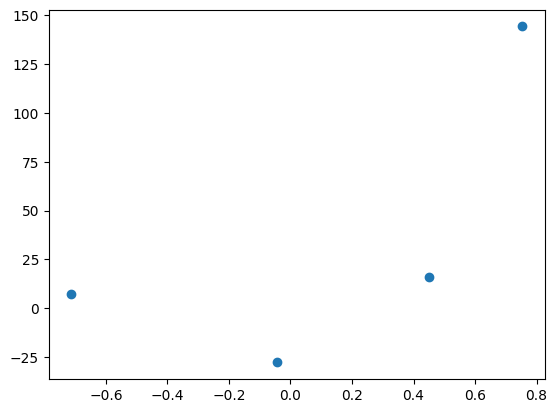

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [15]:
#Lets apply OLS
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [17]:
lr.coef_

array([78.35063668])

In [18]:
lr.intercept_

26.15963284313262

In [19]:
lr.predict(X)

array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

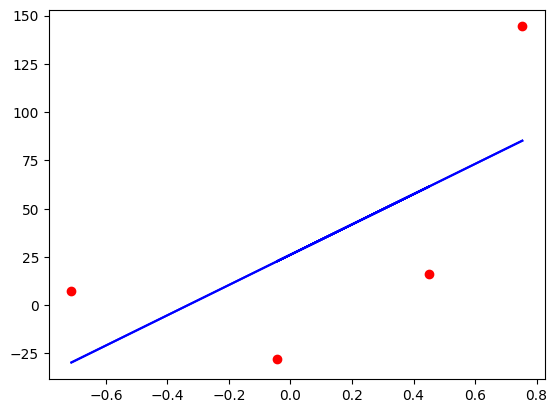

In [24]:
plt.scatter(X,y,color='red')
plt.plot(X,lr.predict(X),color='Blue')
plt.plot(X,lr.predict(X),color='blue')

In [26]:
y_pred = ((78.35 * X) + 0)
y_pred

array([[-55.81580837],
       [ 35.39949674],
       [ -3.48681619],
       [ 59.05759577]])

In [27]:
#Lets apply gradient descent where slope is constant m = 78.5
# and lets assume the starting value for intercept b = 0

y_pred = ((78.35 * X) + 0).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

In [28]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

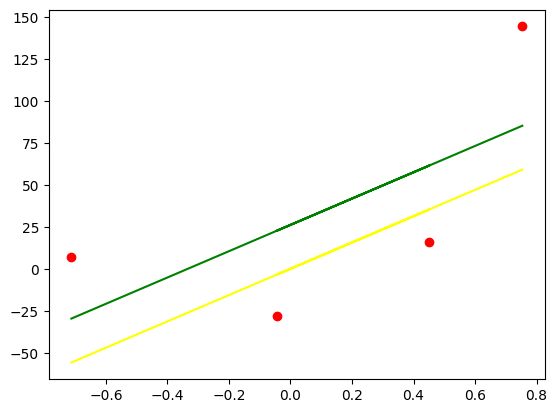

In [29]:
plt.scatter(X,y,color='red')
plt.plot(X,lr.predict(X),color='green',label='OLS')
plt.plot(X,y_pred,color='yellow',label='b=0')
plt.show()

##### Above chart shows that when b=0, i.e., intercept is zero then at m=78.35, Yellow line would be the linear line for us.

In [30]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [32]:
print(X.ravel())


[-0.71239066  0.45181234 -0.04450308  0.75376638]


In [34]:
#Now lets calculate Slope
#.ravel will convert multidimensional array into single flattened array
#Iteration 1
m = 78.35
b = 0

slope = -2 * np.sum(y-m*X.ravel() - b)

In [35]:
slope

-209.27763408209216

In [36]:
#Lets trake learning rate = 0.1
lr_rate = 0.1
step_size = slope*lr_rate
step_size

-20.927763408209216

In [37]:
#Calculate the new intercept
#bnew = bold- (learning rate*slope)
bnew = 0-step_size
bnew

20.927763408209216

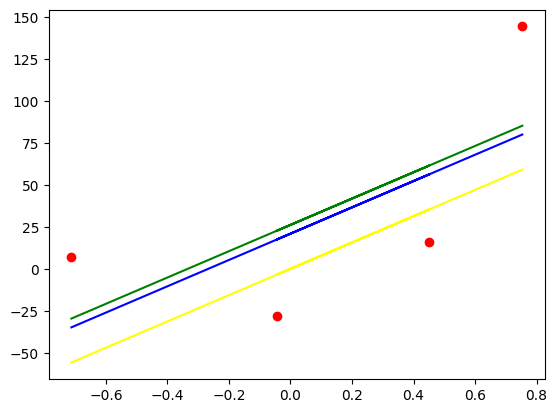

In [41]:
y_pred1 = ((78.35 * X) + bnew).reshape(4)
plt.scatter(X,y,color='red',label='Linear Regression')
plt.plot(X,lr.predict(X),color='green',label='OLS')
plt.plot(X,y_pred,color='yellow',label='b=0')
plt.plot(X,y_pred1,color='blue',label='bnew')
plt.show()

In [31]:
#Now lets calculate Slope
#.ravel will convert multidimensional array into single flattened array
#Iteration 2
m = 78.35
b = bnew

slope = -2 * np.sum(y-m*X.ravel() - b)
print('slope is', slope)
#Lets trake learning rate = 0.1
lr_rate = 0.1
step_size = slope*lr_rate
print('step size is' ,step_size)

#Calculate the new intercept
#bnew = bold- (learning rate*slope)
bnew2 = bnew-step_size
print('New value of b is',bnew2)

slope is -41.85552681641843
step size is -4.185552681641844
New value of b is 25.11331608985106


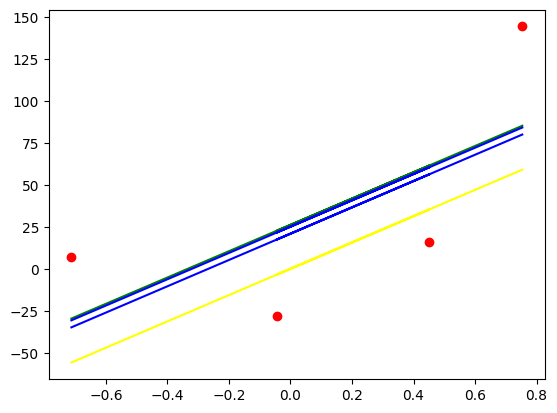

In [32]:
y_pred1 = ((78.35 * X) + bnew).reshape(4)
y_pred2 = ((78.35 * X) + bnew2).reshape(4)
plt.scatter(X,y,color='red')
plt.plot(X,lr.predict(X),color='green',label='OLS')
plt.plot(X,y_pred,color='yellow',label='b=0')
plt.plot(X,y_pred1,color='blue',label='bnew')
plt.plot(X,y_pred2,color='blue',label='bnew2')
plt.show()

In [33]:
#Now lets calculate Slope
#.ravel will convert multidimensional array into single flattened array
#Iteration 3
m = 78.35
b = bnew2

slope = -2 * np.sum(y-m*X.ravel() - b)
print('slope is', slope)
#Lets trake learning rate = 0.1
lr_rate = 0.1
step_size = slope*lr_rate
print('step size is' ,step_size)

#Calculate the new intercept
#bnew = bold- (learning rate*slope)
bnew3 = b-step_size
print('New value of b is',bnew3)

slope is -8.371105363283675
step size is -0.8371105363283675
New value of b is 25.95042662617943


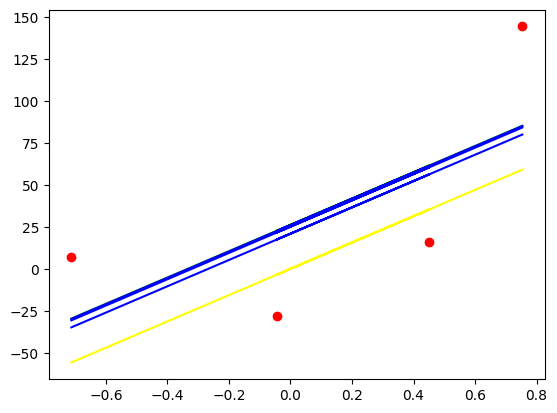

In [34]:
y_pred1 = ((78.35 * X) + bnew).reshape(4)
y_pred2 = ((78.35 * X) + bnew2).reshape(4)
y_pred3 = ((78.35 * X) + bnew3).reshape(4)
plt.scatter(X,y,color='red')
plt.plot(X,lr.predict(X),color='green',label='OLS')
plt.plot(X,y_pred,color='yellow',label='b=0')
plt.plot(X,y_pred1,color='blue',label='bnew')
plt.plot(X,y_pred2,color='blue',label='bnew2')
plt.plot(X,y_pred3,color='blue',label='bnew3')
plt.show()

### Above summary shows that slowly you will reach out to that best line which you want!!
 
 We can also perform this activity with the help of loop!

New value of b is 18.927763408209216


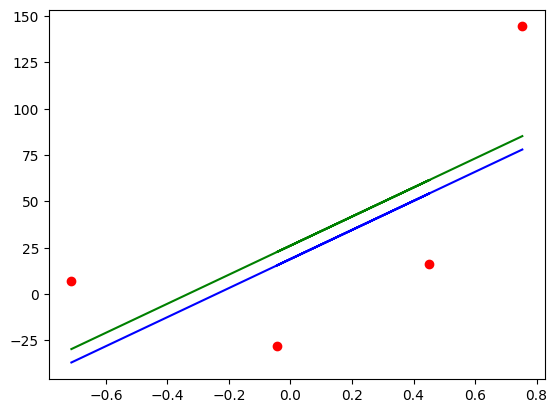

New value of b is 24.71331608985106


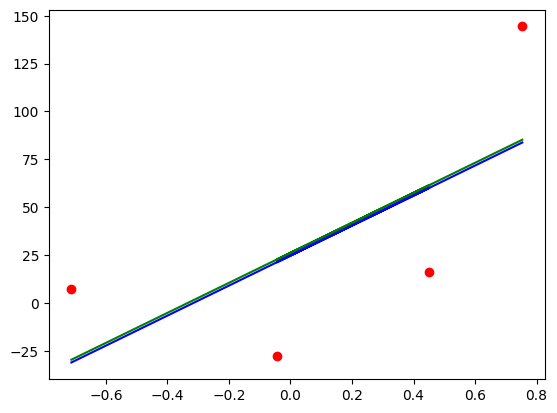

New value of b is 25.870426626179427


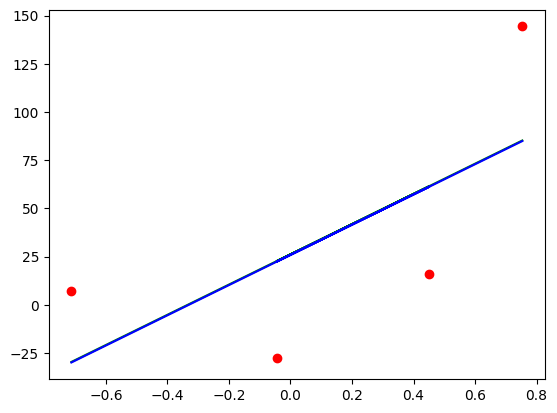

New value of b is 26.101848733445102


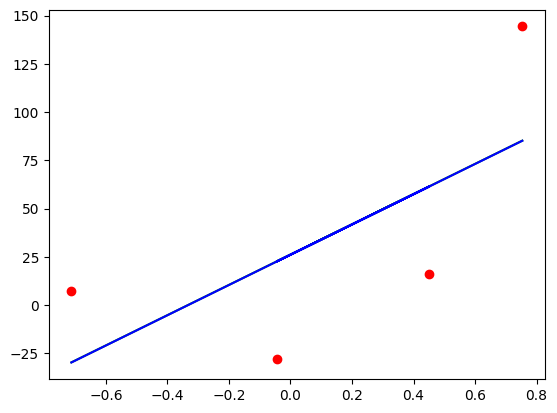

New value of b is 26.148133154898236


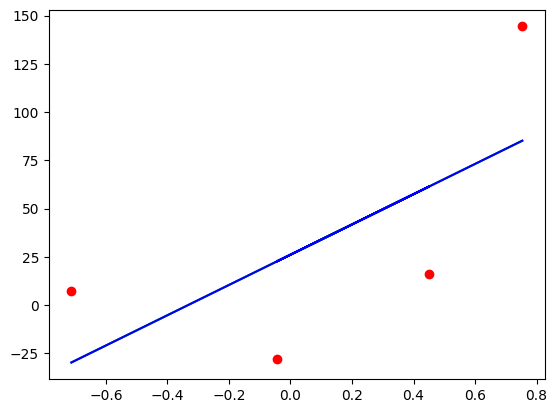

New value of b is 26.157390039188865


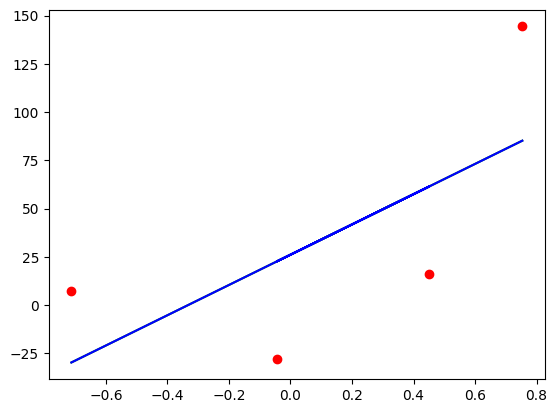

New value of b is 26.15924141604699


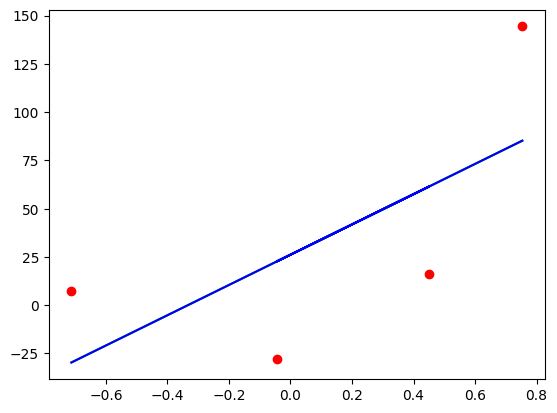

New value of b is 26.159611691418615


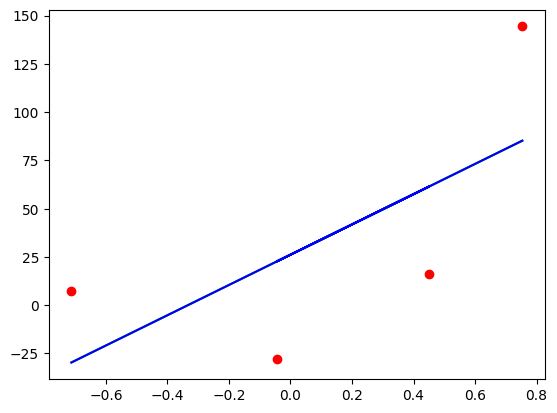

New value of b is 26.15968574649294


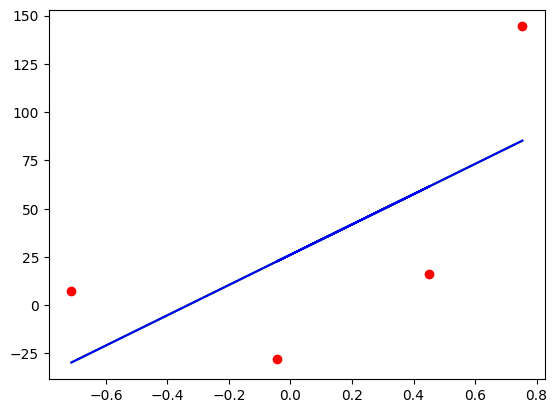

New value of b is 26.159700557507804


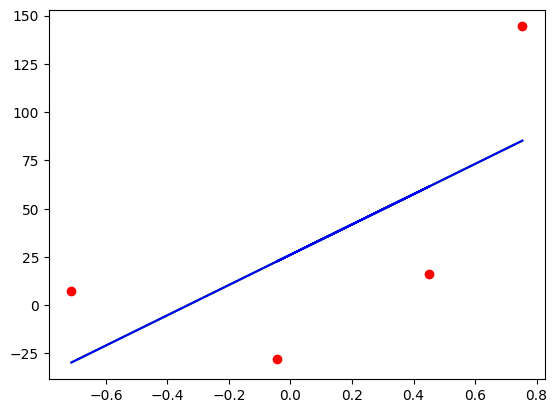

In [39]:
#Lets perform Gradient Descent in iterations

m = 78.35
b = -10
epochs = 10

for i in range(epochs):
    b = b
    slope = -2 * np.sum(y-m*X.ravel() - b)
    #print('slope is', slope)
    #Lets trake learning rate = 0.1
    lr_rate = 0.1
    step_size = slope*lr_rate
    #print('step size is' ,step_size)

    #Calculate the new intercept
    #bnew = bold- (learning rate*slope)
    b = b-step_size
    print('New value of b is',b)
    y_pred1 = ((78.35 * X) + b).reshape(4)
#     y_pred2 = ((78.35 * X) + bnew2).reshape(4)
#     y_pred3 = ((78.35 * X) + bnew3).reshape(4)
    plt.scatter(X,y,color='red')
    plt.plot(X,lr.predict(X),color='green',label='OLS')
    plt.plot(X,y_pred1,color='blue',label='bnew')
    
#     plt.plot(X,y_pred,color='yellow',label='b=0')
    
#     plt.plot(X,y_pred2,color='blue',label='bnew2')
#     plt.plot(X,y_pred3,color='blue',label='bnew3')
    plt.show()